___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

Data vocabulary:

1. #3 (age): age in years 
2. #4 (sex): sex (1 = male; 0 = female) 
3. #9 (cp): cp: chest pain type | Value 0: typical angina | Value 1: atypical angina | Value 2: non-anginal pain | Value 3: asymptomatic 
4. #10 (trestbps): resting blood pressure (in mm Hg on admission to the hospital) 
5. #12 (chol): serum cholestoral in mg/dl 
6. #16 (fbs): (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
7. #19 (restecg): resting electrocardiographic results | Value 0: normal | Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) | Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 
8. #32 (thalach): maximum heart rate achieved 
9. #38 (exang): exercise induced angina (1 = yes; 0 = no) 
10. #40 (oldpeak): ST depression induced by exercise relative to rest 
11. #41 (slope): the slope of the peak exercise ST segment | Value 1: upsloping | Value 2: flat | Value 3: downsloping 
12. #44 (ca): number of major vessels (0-3) colored by flourosopy 
13. #51 (thal): 3 = normal; 6 = fixed defect; 7 = reversable defect 
14. #58 (num) (the predicted attribute): Value 0: < 50% diameter narrowing | Value 1: > 50% diameter narrowing 


* https://archive.ics.uci.edu/ml/datasets/heart+disease

# Import esential Libraries

In [72]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
#pd.options.display.float_format = '{:.3f}'.format

# Ingest the data to notebook

In [73]:
df = pd.read_csv('heart.csv')

In [74]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.300,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.500,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.400,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.800,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.600,2,0,2,1


In [75]:
df.shape

(303, 14)

# EDA

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [77]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.000,54.366,9.082,29.000,47.500,55.000,61.000,77.000
sex,303.000,0.683,0.466,0.000,0.000,1.000,1.000,1.000
cp,303.000,0.967,1.032,0.000,0.000,1.000,2.000,3.000
trestbps,303.000,131.624,17.538,94.000,120.000,130.000,140.000,200.000
chol,303.000,246.264,51.831,126.000,211.000,240.000,274.500,564.000
fbs,303.000,0.149,0.356,0.000,0.000,0.000,0.000,1.000
restecg,303.000,0.528,0.526,0.000,0.000,1.000,1.000,2.000
thalach,303.000,149.647,22.905,71.000,133.500,153.000,166.000,202.000
exang,303.000,0.327,0.470,0.000,0.000,0.000,1.000,1.000
oldpeak,303.000,1.040,1.161,0.000,0.000,0.800,1.600,6.200


In [78]:
df.isnull().sum()
# There isn't any null value

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [82]:
df['target'].value_counts()
# "target" column is our dependent variable

1    165
0    138
Name: target, dtype: int64

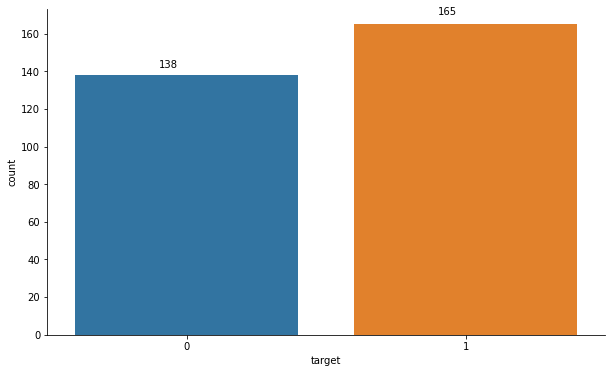

In [83]:
ax = sns.countplot(df['target'])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + 0.3, p.get_height() * 1.03));

In [84]:
df.duplicated().sum()
# There is a dublicate value in our rows

1

In [85]:
df = df.drop_duplicates()

In [86]:
df.shape

(302, 14)

In [87]:
# check
df.duplicated().sum()

0

In [88]:
df.corr()  # Correlation

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000,-0.095,-0.063,0.283,0.207,0.119,-0.112,-0.395,0.093,0.206,-0.164,0.302,0.065,-0.221
sex,-0.095,1.000,-0.052,-0.058,-0.196,0.046,-0.060,-0.046,0.143,0.098,-0.033,0.113,0.211,-0.284
cp,-0.063,-0.052,1.000,0.046,-0.073,0.096,0.042,0.293,-0.393,-0.147,0.117,-0.195,-0.160,0.432
trestbps,0.283,-0.058,0.046,1.000,0.125,0.178,-0.115,-0.048,0.069,0.195,-0.123,0.099,0.063,-0.146
chol,0.207,-0.196,-0.073,0.125,1.000,0.011,-0.148,-0.005,0.064,0.050,0.000,0.087,0.097,-0.081
fbs,0.119,0.046,0.096,0.178,0.011,1.000,-0.083,-0.007,0.025,0.005,-0.059,0.145,-0.033,-0.027
restecg,-0.112,-0.060,0.042,-0.115,-0.148,-0.083,1.000,0.041,-0.069,-0.056,0.090,-0.083,-0.010,0.135
thalach,-0.395,-0.046,0.293,-0.048,-0.005,-0.007,0.041,1.000,-0.377,-0.342,0.385,-0.228,-0.095,0.420
exang,0.093,0.143,-0.393,0.069,0.064,0.025,-0.069,-0.377,1.000,0.287,-0.256,0.125,0.206,-0.436
oldpeak,0.206,0.098,-0.147,0.195,0.050,0.005,-0.056,-0.342,0.287,1.000,-0.576,0.237,0.209,-0.429


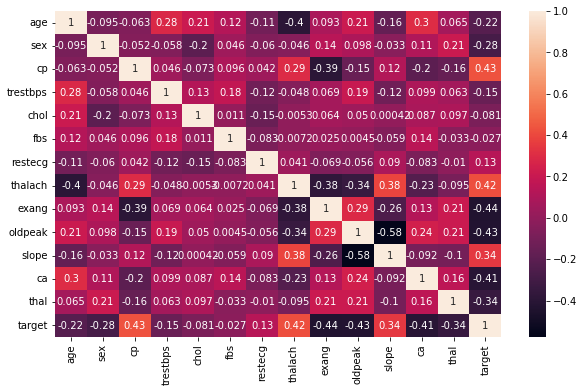

In [89]:
sns.heatmap(df.corr(), annot=True);  # heatmap (Correlation)

<AxesSubplot:>

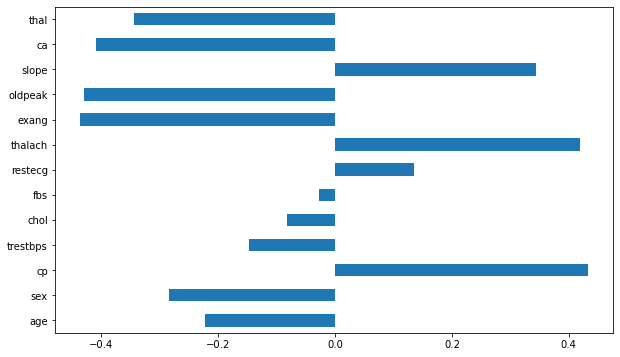

In [90]:
# Realations of each columns with target
df.corr()['target'].drop('target').plot.barh()

# Data Preprocessing

* Train | Test Split and Scaling

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [92]:
X = df.drop('target',axis=1)  # features
y = df['target']  # target

In [93]:
# Train and test data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [94]:
scaler = StandardScaler()

In [95]:
X_train_scaled = scaler.fit_transform(X_train)  # fit the train data set (make a mold for dataset)
X_test_scaled = scaler.transform(X_test)  # transform the test data set (fit the mold to dataset)                                                                                                                                                                                                                                                                                

# Implement Logistic Regression and Evaluate

In [96]:
from sklearn.linear_model import LogisticRegression

In [97]:
log_model = LogisticRegression()

In [98]:
log_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [99]:
log_model.coef_  # b1 (Coefficients of the features)

array([[-0.06843536, -0.72568886,  0.86032479, -0.30631257, -0.13173309,
         0.04646936,  0.23462867,  0.35577216, -0.40599663, -0.63117356,
         0.28318166, -0.70013381, -0.56979395]])

In [100]:
log_model.intercept_  # b0

array([0.13642337])

In [101]:
# Predicts for test dataset
y_pred = log_model.predict(X_test_scaled) 
y_pred

array([1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0], dtype=int64)

In [102]:
# We can also see the probability
y_pred_proba = log_model.predict_proba(X_test_scaled)
y_pred_proba

array([[0.05809744, 0.94190256],
       [0.24199193, 0.75800807],
       [0.24734205, 0.75265795],
       [0.02202845, 0.97797155],
       [0.98352213, 0.01647787],
       [0.14438326, 0.85561674],
       [0.08219318, 0.91780682],
       [0.9855165 , 0.0144835 ],
       [0.85251506, 0.14748494],
       [0.25552797, 0.74447203],
       [0.72826734, 0.27173266],
       [0.34029243, 0.65970757],
       [0.37541504, 0.62458496],
       [0.62866545, 0.37133455],
       [0.08419418, 0.91580582],
       [0.21383075, 0.78616925],
       [0.01190077, 0.98809923],
       [0.19957878, 0.80042122],
       [0.21080563, 0.78919437],
       [0.98908298, 0.01091702],
       [0.97297158, 0.02702842],
       [0.9495466 , 0.0504534 ],
       [0.32464833, 0.67535167],
       [0.79300226, 0.20699774],
       [0.92310139, 0.07689861],
       [0.03745048, 0.96254952],
       [0.98239166, 0.01760834],
       [0.27025925, 0.72974075],
       [0.97891259, 0.02108741],
       [0.07020376, 0.92979624],
       [0.

* Confusion Matrix

In [103]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

In [104]:
confusion_matrix(y_test,y_pred)

array([[12,  2],
       [ 1, 16]], dtype=int64)

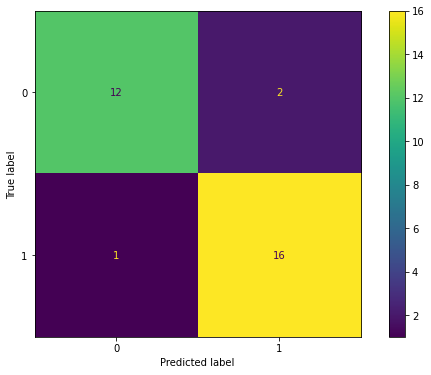

In [105]:
plot_confusion_matrix(log_model, X_test_scaled, y_test);

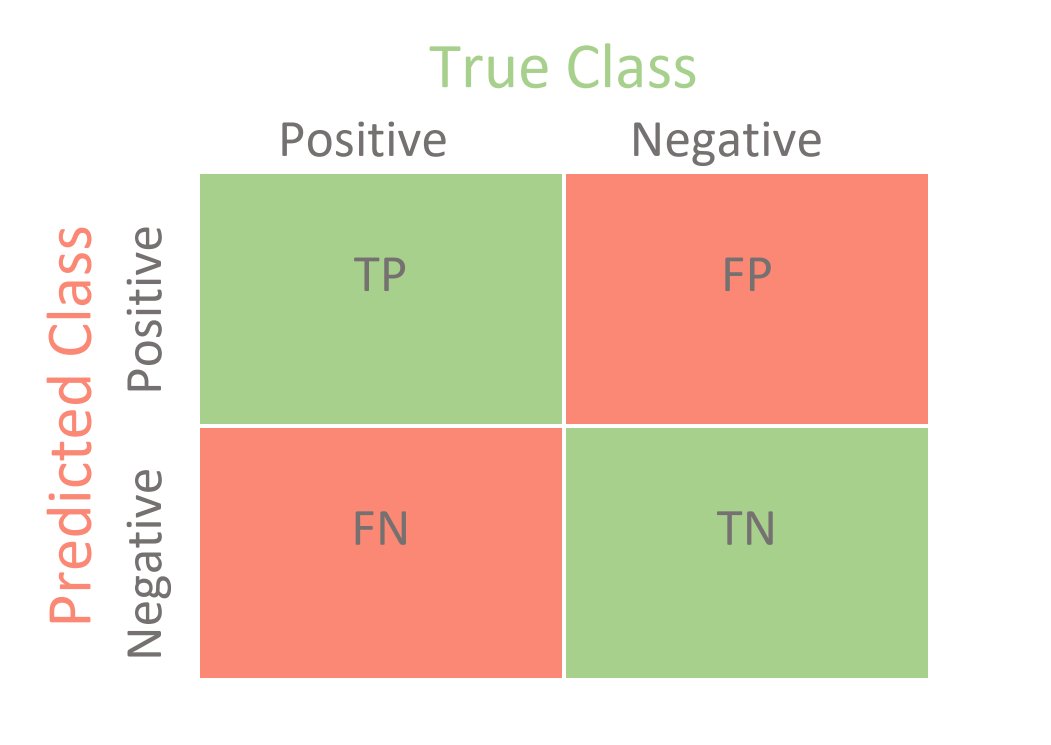

In [106]:
from PIL import Image
image = Image.open('confusion_matrix.png')
image

* Evaluating Performance-Classification Error Metrics

In [107]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.86      0.89        14
           1       0.89      0.94      0.91        17

    accuracy                           0.90        31
   macro avg       0.91      0.90      0.90        31
weighted avg       0.90      0.90      0.90        31



In [108]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

In [111]:
# We will use for visually compare the models
log_pred = log_model.predict(X_test_scaled)
log_recall = recall_score(y_test, log_pred)
log_recall

0.9411764705882353

* Cross Validatation

In [114]:
# Let's check our results with cross validation

In [112]:
from sklearn.model_selection import cross_validate

In [113]:
model = LogisticRegression()

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['accuracy', 'precision_weighted','recall_weighted',
                                                                   'f1_weighted'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy             0.823
test_precision_weighted   0.828
test_recall_weighted      0.823
test_f1_weighted          0.821
dtype: float64

* GridSearchCV

In [116]:
# Let's find the best parameter with GridSearchCV

In [117]:
from sklearn.model_selection import GridSearchCV

In [118]:
model = LogisticRegression()

penalty = ["l1", "l2"]
C = np.logspace(-1, 5, 20)
class_weight= ["balanced", None] 
# The "balanced" mode uses the values of y to automatically adjust weights inversely proportional to class frequencies 
# in the input data
solver = ["lbfgs", "liblinear", "sag", "saga"]

param_grid = {"penalty" : penalty,
              "C" : C,
              "class_weight":class_weight,
              "solver":solver}


grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          cv=10,
                          scoring = "recall",   #f1_0 = make_scorer(f1_score, pos_label =0)
                          n_jobs = -1)

In [119]:
grid_model.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+03, 2.63665090e+03, 5.45559478e+03,
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05]),
                         'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear', 'sag', 'saga']},
             scoring='recall')

In [120]:
grid_model.best_params_

{'C': 0.1, 'class_weight': None, 'penalty': 'l1', 'solver': 'saga'}

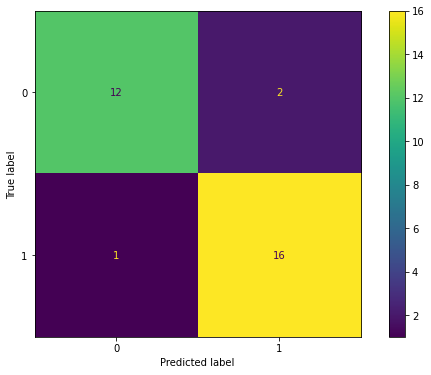

In [121]:
plot_confusion_matrix(grid_model, X_test_scaled, y_test);

* Evaluating Performance-Classification Error Metrics

In [122]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[12  2]
 [ 1 16]]
              precision    recall  f1-score   support

           0       0.92      0.86      0.89        14
           1       0.89      0.94      0.91        17

    accuracy                           0.90        31
   macro avg       0.91      0.90      0.90        31
weighted avg       0.90      0.90      0.90        31



* ROC (Receiver Operating Curve) and AUC (Area Under Curve)

In [123]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc, roc_curve, average_precision_score, precision_recall_curve

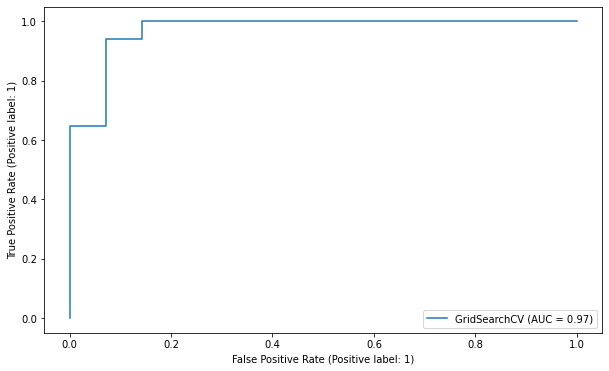

In [124]:
plot_roc_curve(grid_model, X_test_scaled, y_test);

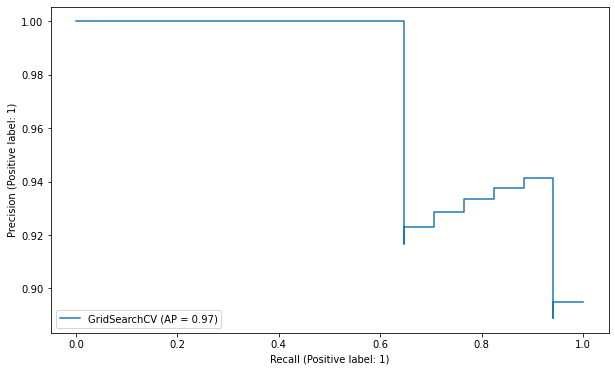

In [125]:
plot_precision_recall_curve(grid_model, X_test_scaled, y_test);

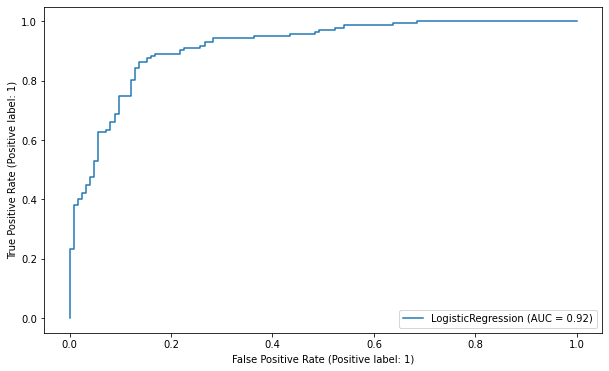

In [126]:
plot_roc_curve(log_model, X_train_scaled, y_train);

In [127]:
# Default parameters and best parameters are giving same results

# Implement KNN and Evaluate

In [128]:
from sklearn.neighbors import KNeighborsClassifier

In [129]:
knn_model = KNeighborsClassifier(n_neighbors=5) 

In [130]:
knn_model.fit(X_train_scaled,y_train)

KNeighborsClassifier()

In [131]:
y_pred = knn_model.predict(X_test_scaled)
y_pred

array([1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0], dtype=int64)

In [132]:
y_pred_proba = knn_model.predict_proba(X_test_scaled)
y_pred_proba

array([[0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.6, 0.4],
       [0.6, 0.4],
       [0.6, 0.4],
       [0.4, 0.6],
       [0.8, 0.2],
       [0.2, 0.8],
       [0.2, 0.8],
       [0. , 1. ],
       [0.4, 0.6],
       [0.2, 0.8],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.6, 0.4],
       [0.8, 0.2],
       [0.8, 0.2],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ]])

In [133]:
my_dict = {"Actual": y_test, "Pred":y_pred, "Proba_1":y_pred_proba[:,1], "Proba_0":y_pred_proba[:,0]}

In [134]:
pd.DataFrame.from_dict(my_dict).sample(10)

,Actual,Pred,Proba_1,Proba_0
187,0,0,0.000,1.000
170,0,0,0.400,0.600
4,1,1,0.600,0.400
280,0,0,0.400,0.600
15,1,1,1.000,0.000
211,0,0,0.000,1.000
162,1,1,1.000,0.000
8,1,1,1.000,0.000
205,0,0,0.200,0.800
41,1,1,0.800,0.200


* Confusion Matrix

In [135]:
confusion_matrix(y_test, y_pred)

array([[13,  1],
       [ 3, 14]], dtype=int64)

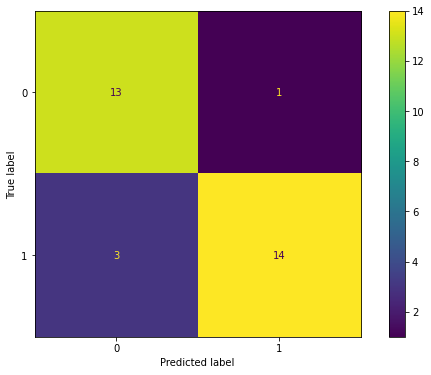

In [136]:
plot_confusion_matrix(knn_model, X_test_scaled, y_test);

* Evaluating Performance-Classification Error Metrics

In [137]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[13  1]
 [ 3 14]]
              precision    recall  f1-score   support

           0       0.81      0.93      0.87        14
           1       0.93      0.82      0.87        17

    accuracy                           0.87        31
   macro avg       0.87      0.88      0.87        31
weighted avg       0.88      0.87      0.87        31



In [138]:
# We will use for in visually compare the models
knn_pred = knn_model.predict(X_test_scaled)
knn_recall = recall_score(y_test, knn_pred)
knn_recall

0.8235294117647058

# Visually compare models based on your chosen metric

In [139]:
plt.figure(figsize=(10, 6))

rec_df = pd.DataFrame({'log_reg_recall_score': log_recall,
                       'knn_recall_score': knn_recall}, index=[0])

rec_df

,log_reg_recall_score,knn_recall_score
0,0.941,0.824


<Figure size 720x432 with 0 Axes>

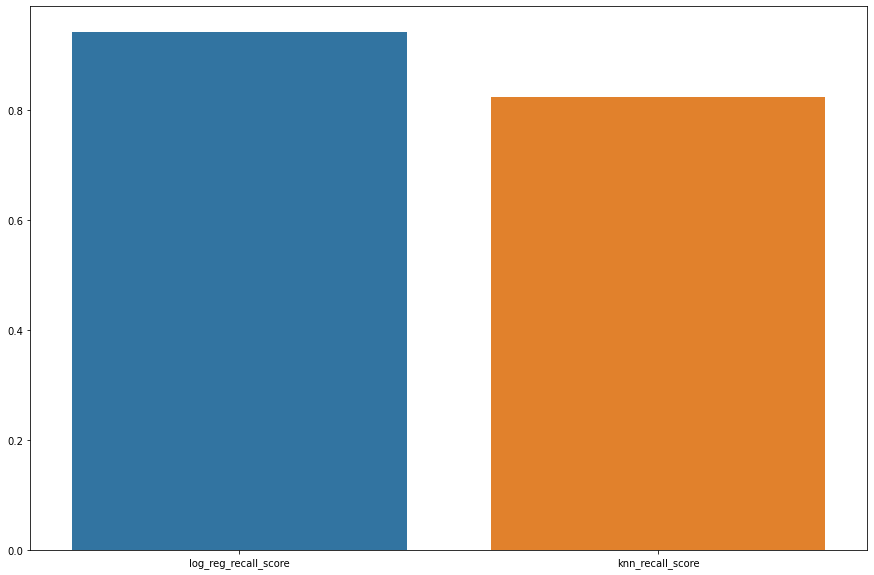

In [140]:
plt.figure(figsize=(15, 10))
sns.barplot(x=rec_df.columns, y=rec_df.iloc[0].values);

# Chose best model and make a random prediction 

In [141]:
final_X_scaled = scaler.fit_transform(X)

In [142]:
final_model = log_model

In [143]:
final_model.fit(final_X_scaled,y)

LogisticRegression()

In [144]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.300,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.500,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.400,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.800,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.600,2,0,2,1


In [145]:
example_values = [[32,1,2,122,215,0,0,200,1,2.1,1,1,0]]  # age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal

In [146]:
final_model.predict(example_values)  # target = 1

array([1], dtype=int64)